### Squid Game: Survive the Bridge Game? 
###### From $\textit{Atypical Quant}$ Youtube channel: https://www.youtube.com/watch?v=Q1Rbr2LHFWo&list=PLADLdjl79_mhdmhdxA1Gk8sklGEWJkEKq&index=20
##### Ahead of the players is a bridge with 18 steps, each made of a pair of glass tiles. One of them can hold the weight of a player, while the other can't. Players advance on the bridge in a predetermined order (i.e., they know the outcome of the moves of previous players), one pair of tiles at a time. If they choose a solid tile, they advance, otherwise they are 'eliminated'.What is the expected number of 'survivors' in a 16-player game?

##### We first compute analytically $\mathbb E[N_\text{survivors}]=\sum_{N=0}^{16} N \times \mathbb P(N)$.
##### For there to be 16 survivors, the first player must clear all 18 steps: $\mathbb P(16)=0.5^{18}$. All following players will know the safe path.
##### For there to be 15 survivors, 18 steps must be cleared by the first and the second player. There are 18 sums of cleared steps by the first and the second player which yield 18. Thus: $\mathbb P(15)=18\times0.5^{18}$.
##### For there to be 14 survivors, the first 3 players must clear 18 steps. This can be accomplished by the second player failing at the last, or by the third clearing all remaining steps whence the second player failed. There are $\binom{18}{2}$ ways for this to happen, and each of these has a probability of $0.5^{18}$. Because these are mutually exclusive events, we have: $\mathbb P(14)=\binom{18}{2}\times0.5^{18}$. The binomial coefficient can be understood as follows. The sum of steps from the first 3 players must equal 18: $$ x_1 + x_2 + x_3 = 18.$$ Because the third player may have to clear no steps (because the second player failed at the last), $x_1$ and $x_2$ are positive integers, while $x_3$ is non-negative. From this condition we get: $$ y_1 + y_2 + x_3 = 16, $$ where we assume $y_1=x_1-1, y_2=x_2-1, x_3 \in \mathbb N_0$. This way, we can compute the number of solutions to this equation which yields the number of ways 3 players can clear the 18 steps with the caveat that the third may have to clear none. The number of solutions is given by the stars and bars theorem: $$ \binom{16~\text{stars} + 2~\text{bars}}{2~\text{bars}}=\bigg(\frac{18!}{16!\times2!}\bigg).$$
##### The above argument may be generalized to all other $\mathbb P(N)$. Thus: $$ E[N_\text{survivors}]=\sum_{k=0}^{16} (16-k) \times \binom{18}{k} \times 0.5^{18} \approx 7 $$

In [140]:
# prove that the sum converges to 7
import numpy as np
from scipy.special import comb

n = 18
p = 0.5
sum_result = 0

# compute the sum
for k in range(17):  # k ranges from 0 to 16 inclusive
    term = (16 - k) * comb(n, k) * (p ** n)
    sum_result += term

print('The expected number of survivors is:', round(sum_result,4))

The expected number of survivors is: 7.0001


In [141]:
#### We now prove this with a simple MC simulation

n_players = 16
n_steps = 18
n_simulations = 10000

# simulate game
def simulate_game(n_players, n_steps):
    # generate path
    path = np.zeros((n_steps, 2), dtype=bool)
    for step in range(n_steps):
        safe_tile = np.random.choice([0, 1])
        path[step, safe_tile] = True

    survivors = 0
    step_start = 0

    for player in range(n_players):
        survived = True
        for step in range(step_start, n_steps):
            chosen_tile = np.random.choice([0, 1])
            if not path[step, chosen_tile]:
                survived = False
                step_start = step + 1 # update step_start to the next step after the player failed
                break
        if survived:
            survivors = n_players - player # all players after this player survived
            break

    return survivors

# now run MC sims
survivor_counts = [simulate_game(n_players, n_steps) for _ in range(n_simulations)]
print('The mean of the number of simulated survivors is:', np.mean(survivor_counts))

The mean of the number of simulated survivors is: 6.9998


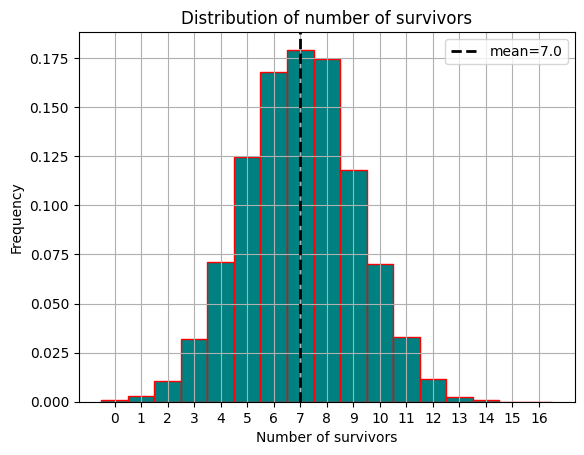

In [142]:
import matplotlib.pyplot as plt

# plot the distribution of the number of survivors
plt.hist(survivor_counts, bins=range(n_players + 2), color='teal', edgecolor='red', align='left', density=True)
plt.axvline(np.mean(survivor_counts), color='black', linestyle='dashed', linewidth=2, label='mean={}'.format(round(np.mean(survivor_counts), 2)))

plt.xlabel('Number of survivors')
plt.ylabel('Frequency')
plt.title('Distribution of number of survivors')
plt.xticks(range(n_players + 1))
plt.legend(loc='upper right')
plt.grid()

plt.show()